In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\AI\archive\Dataset-SA.csv")

In [3]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [4]:
Summary=df["Summary"].to_list()

In [5]:
Summary

['great cooler excellent air flow and for this price its so amazing and unbelievablejust love it',
 'best budget 2 fit cooler nice cooling',
 'the quality is good but the power of air is decent',
 'very bad product its a only a fan',
 'ok ok product',
 'the cooler is really fantastic and provides good air flow highly recommended',
 'very good product',
 'very nice',
 'very bad cooler',
 'very good',
 'beautiful product good material and perfectly working',
 'awesome',
 'good',
 'wonderful product must buy',
 'nice air cooler smart cool breeze producer',
 'awsm',
 'nice product',
 'great cooler',
 'nice product',
 'good',
 'very nice product',
 'good product',
 'nice product with the reasonable price',
 'i like it',
 'very goodd',
 'good product',
 'good product kawaleti',
 'very good cooler amazing beautiful designs affordable price',
 'using since 3months great experience',
 'very good performance and nice look',
 'product is good having strong thrust of air flow must buy',
 'very goo

In [6]:
Sentiment=df["Sentiment"].to_list()

In [7]:
Sentiment

['positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',


In [8]:
token=Tokenizer()

In [9]:
Summary= [str(item) for item in Summary] 

In [10]:
token.fit_on_texts(Summary)
seq=token.texts_to_sequences(Summary)
seq

[[55, 328, 36, 200, 1004, 6, 9, 11, 24, 18, 28, 64, 6, 9440, 73, 8],
 [20, 174, 99, 242, 328, 5, 379],
 [7, 10, 3, 1, 19, 7, 176, 16, 200, 3, 313],
 [4, 26, 2, 18, 17, 65, 17, 215],
 [46, 46, 2],
 [7, 328, 3, 53, 236, 6, 1153, 1, 200, 1004, 317, 234],
 [4, 1, 2],
 [4, 5],
 [4, 26, 328],
 [4, 1],
 [131, 2, 1, 139, 6, 326, 41],
 [29],
 [1],
 [208, 2, 101, 30],
 [5, 200, 328, 225, 297, 3392, 9441],
 [802],
 [5, 2],
 [55, 328],
 [5, 2],
 [1],
 [4, 5, 2],
 [1, 2],
 [5, 2, 21, 7, 367, 24],
 [12, 40, 8],
 [4, 9442],
 [1, 2],
 [1, 2, 18336],
 [4, 1, 328, 64, 131, 3030, 387, 24],
 [80, 310, 2962, 55, 136],
 [4, 1, 100, 6, 5, 140],
 [2, 3, 1, 481, 334, 11685, 16, 200, 1004, 101, 30],
 [4, 1],
 [26, 10],
 [4, 5, 2],
 [4, 3283, 2, 6, 93, 24, 114, 286],
 [5],
 [7,
  20,
  5899,
  58,
  12,
  150,
  56,
  4799,
  8,
  146,
  75,
  40,
  1172,
  6,
  24,
  3,
  38,
  367,
  65,
  475,
  18337],
 [328,
  3,
  197,
  6,
  2192,
  2963,
  210,
  636,
  2315,
  185,
  179,
  3,
  1,
  165,
  328,
  2354,

In [11]:
vocab_size=len(token.word_index)+1
vocab_size

47581

In [12]:
token.word_index

{'good': 1,
 'product': 2,
 'is': 3,
 'very': 4,
 'nice': 5,
 'and': 6,
 'the': 7,
 'it': 8,
 'for': 9,
 'quality': 10,
 'this': 11,
 'i': 12,
 'to': 13,
 'not': 14,
 'in': 15,
 'of': 16,
 'a': 17,
 'its': 18,
 'but': 19,
 'best': 20,
 'with': 21,
 'you': 22,
 'flipkart': 23,
 'price': 24,
 'money': 25,
 'bad': 26,
 'super': 27,
 'so': 28,
 'awesome': 29,
 'buy': 30,
 'was': 31,
 'as': 32,
 'one': 33,
 'my': 34,
 'are': 35,
 'excellent': 36,
 'on': 37,
 'also': 38,
 'have': 39,
 'like': 40,
 'working': 41,
 'at': 42,
 'after': 43,
 'sound': 44,
 'value': 45,
 'ok': 46,
 'dont': 47,
 'happy': 48,
 'just': 49,
 'all': 50,
 'no': 51,
 'go': 52,
 'really': 53,
 'delivery': 54,
 'great': 55,
 'from': 56,
 'use': 57,
 'that': 58,
 'can': 59,
 'am': 60,
 'time': 61,
 'worth': 62,
 'thanks': 63,
 'amazing': 64,
 'only': 65,
 'too': 66,
 'thank': 67,
 'much': 68,
 'be': 69,
 'products': 70,
 'if': 71,
 'small': 72,
 'love': 73,
 'will': 74,
 'superb': 75,
 'by': 76,
 'size': 77,
 'installation'

In [13]:
max_len=max([len(s)for s in seq])
max_len

108

In [14]:
padded_seq=sequence.pad_sequences(seq,maxlen=max_len,padding="post")
padded_seq

array([[ 55, 328,  36, ...,   0,   0,   0],
       [ 20, 174,  99, ...,   0,   0,   0],
       [  7,  10,   3, ...,   0,   0,   0],
       ...,
       [  4,   5,   6, ...,   0,   0,   0],
       [ 29,   2,   0, ...,   0,   0,   0],
       [  4,   1,  19, ...,   0,   0,   0]], dtype=int32)

In [15]:
sent_index = np.array([1 if sent == "positive" else (0 if sent == "negative" else 2) for sent in Sentiment])
sent_index

array([1, 1, 1, ..., 1, 1, 2])

In [16]:
model = Sequential([
    Embedding(vocab_size,32,input_length = max_len),
    SimpleRNN(32),
    Dense (1, activation = "sigmoid")
])

In [17]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [18]:
model.fit(padded_seq,sent_index,epochs=20,verbose=True)

Epoch 1/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 1163s 180ms/step - accuracy: 0.8117 - loss: 0.2991
Epoch 2/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 1086s 169ms/step - accuracy: 0.8165 - loss: 0.2088
Epoch 3/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 331s 52ms/step - accuracy: 0.8343 - loss: -0.2408
Epoch 4/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 341s 53ms/step - accuracy: 0.8382 - loss: -0.9849
Epoch 5/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 244s 38ms/step - accuracy: 0.8289 - loss: -2.0091
Epoch 6/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 199s 31ms/step - accuracy: 0.8305 - loss: -0.6187
Epoch 7/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 205s 32ms/step - accuracy: 0.8126 - loss: -0.0838
Epoch 8/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 204s 32ms/step - accuracy: 0.8120 - loss: -0.5767
Epoch 9/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 207s 32ms/step - accuracy: 0.8086 - loss: -1.3796
Epoch 10/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 213s 33ms/step - accuracy: 0.8082 - loss: -0.4407
Epoch 11/20
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 207s 32ms/step - accuracy: 0.8122 

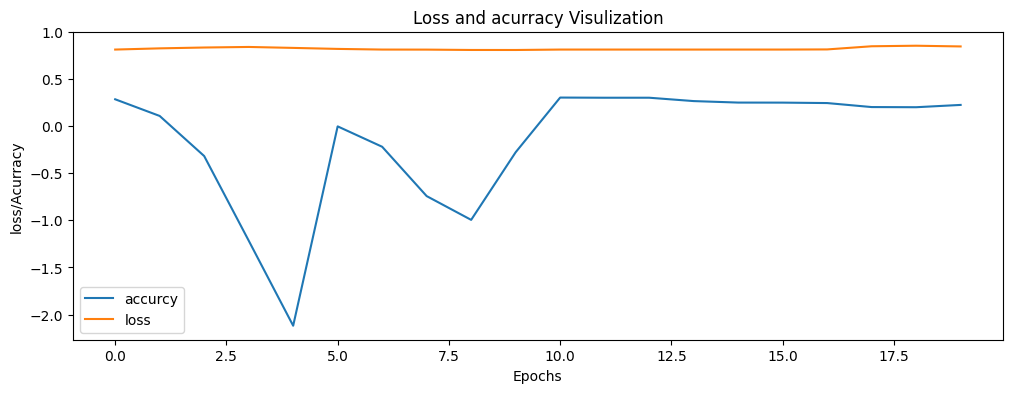

In [19]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["loss"],label=["accurcy"])
plt.plot(model.history.history["accuracy"],label=["loss"])
plt.title("Loss and acurracy Visulization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss/Acurracy")
plt.show()

In [38]:
def sentiment_analyzer(text):
    text_seq = token.texts_to_sequences(text)
    padd_text_seq = sequence.pad_sequences(text_seq, maxlen=max_len, padding="post")
    pred = model.predict(padd_text_seq)
    probability = pred[0][0]  
    if probability >= 0.7:
        sentiment = "Positive"
    elif probability >= 0.3:
        sentiment = "Neutral"
    else:
        sentiment = "Negative"
    
    return sentiment   

In [39]:
new_text = np.array(["'beautiful product good material and perfectly working'"])

In [40]:
sentiment_analyzer(new_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


'Positive'

In [41]:
sentiment_analyzer(["bad quality"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'Negative'

In [42]:
sentiment_analyzer(["best product"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


'Positive'

In [43]:
sentiment_analyzer(["ok ok product 	"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


'Positive'

In [44]:
sentiment_analyzer(["Flipkart offers a seamless shopping experience with a wide selection of products, fast delivery, secure packaging, and excellent customer service."])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'Positive'

In [45]:
sentiment_analyzer(["Flipkart offers a great shopping experience with fast delivery"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'Positive'

In [46]:
sentiment_analyzer(["bad delivery"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


'Negative'